In [17]:
#=======IMPORT HERRAMIENTAS NECESARIAS
import os
import numpy as np
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
import cv2
from matplotlib import pyplot as plt
from zipfile import ZipFile
with ZipFile("personas.zip",'r') as zipp:
  zipp.extractall()
  print("DONE")


DONE


In [30]:
#=======IMPORTAR EL DATASET DISPONIBLE ============================
#lista con los nombres de personas 
nombres=["ann_veneman_","adrien_brody_","richard_gephardt_","winona_ryder_"]
path=os.getcwd()
datas=[]
for na in nombres:
    #CONSEGUIR LA CANTIDAD DE ELEMENTOS DEL DATASET
    N=len(os.listdir(os.path.join("personas/",na)))
    datas.append(N)
#NÚMERO DE MUESTRAS DISPONIBLES DE TODO EL DATASET
Ns=0
#DETERMINAR LA CANTIDAD DE MUESTRAS POR PERSONA
for a in datas:
    Ns=a+Ns
print('MUESTRAS EN TOTAL',Ns)
print('MUESTRAS POR PERSONAS',datas)
#CREAR LAS ENTRDAS DESEADAS DE LAS IMAGENES 
X=[]
for na in nombres:
    #cada nombre
    faces=os.listdir(os.path.join("personas/",na))
    #print(faces)
    for im in faces:
        #leer la imagen
        Igray=plt.imread(os.path.join("personas/",na,im))
        #realizar un cambio de dimensiones a 224,224 
        imr=cv2.resize(Igray,(224,224),interpolation=cv2.INTER_CUBIC)
        #realizar un cambio de escalamiento a la imagen imr
        imr=imr.astype(np.float)
        imr=imr/np.max(imr)-0.5
        #agregar a la lista X
        X.append(imr)



#==================TARGET VALUES ==========================
t=[]
#para cada dato
for val ,it in zip(datas,range(len(datas))):
    for i in range(val):
        t.append(it)
#definir función one_hot_encoding(t,N)
def one_hot_encoding(t,N=None):
    S=len(t)
    if N is None:
        print("ERROR")
    else:
        #obtener la información de los elementos de la lista t
        T=np.zeros((S,N),dtype=np.float)
        #realizar un recorrido sobre cada elemento de la lista t
        for v,i in zip(t,range(S)):
            if v <N and isinstance(v,int):
                #si i es un valor menor que el parametro S cantidad de muestras
                T[i,v]=1
            else:
                break
        return T
#convertir los labels en matriz mediante el método de one-hot-encoding
T=one_hot_encoding(t,N=4)
print('INPUT: ',X[0].shape,'MUESTRAS: ',len(X))
print('TARGET: N clases ', T.shape[1],'MUESTRAS',T.shape[0])

MUESTRAS EN TOTAL 58
MUESTRAS POR PERSONAS [11, 12, 11, 24]
INPUT:  (224, 224) MUESTRAS:  58
TARGET: N clases  4 MUESTRAS 58


In [0]:
Batch_size=1
input_channels=1
N_clases = 4

In [36]:
grafo=tf.Graph()
#========CREAR LA ARQUITECTURA VGG16 ===============
with grafo.as_default():
    #----------============CREAR TENSORES DE ENTRADA----------=============
    #-PLACEHOLDER
    Xi=tf.compat.v1.placeholder(shape=(Batch_size,224,224,input_channels),dtype=tf.float32,name="Xi")
    Ti=tf.compat.v1.placeholder(shape=(4,Batch_size),dtype=tf.float32,name="Ti")
    # ig=np.expand_dims(np.zeros((224,224,3),dtype=np.float),axis=0)
    # img=tf.constant(ig,dtype=tf.float32,name="img")
    # -------------------------------------------

    # ---------------------INPUT <=> 224,224,input_channels
    # --------------- bloque 1 --------------
    # conv2d 3x3
    W11 = tf.Variable(np.random.randn(3, 3, input_channels, 64), dtype=tf.float32, name="W11")
    conv11 = tf.nn.conv2d(Xi, filters=W11, data_format="NHWC", padding="SAME", strides=1)
    conv11=tf.nn.relu(conv11)
    W12 = tf.Variable(np.random.randn(3, 3, 64, 64), dtype=tf.float32, name="W12")
    conv12 = tf.nn.conv2d(conv11, filters=W12, data_format="NHWC", padding="SAME", strides=1)
    conv112 = tf.nn.relu(conv12)
    # max_pool2d
    max12 = tf.nn.max_pool2d(conv12, ksize=(2, 2), strides=(2, 2), padding="VALID")
    # ---------------- (OUTPUT <=>) 112,112,64

    # ---------------------INPUT <=> 112,112,64
    # --------------- bloque 2 --------------
    # conv2d 3x3
    W21 = tf.Variable(np.random.randn(3, 3, 64, 128), dtype=tf.float32, name="W21")
    conv21 = tf.nn.conv2d(max12, filters=W21, data_format="NHWC", padding="SAME", strides=1)
    conv21=tf.nn.relu(conv21)
    W22 = tf.Variable(np.random.randn(3, 3, 128, 128), dtype=tf.float32, name="W22")
    conv22 = tf.nn.conv2d(conv21, filters=W22, data_format="NHWC", padding="SAME", strides=1)
    conv22=tf.nn.relu(conv22)
    # relu
    # relu22 = tf.nn.relu(conv22)
    # max_pool2d
    max22 = tf.nn.max_pool2d(conv22, ksize=(2, 2), strides=(2, 2), padding="VALID")
    # ---------------- (OUTPUT <=>) 56,56,128

    # ---------------------INPUT <=> 56,56,128
    # --------------- bloque 3 --------------
    # conv2d 3x3
    W31 = tf.Variable(np.random.randn(3, 3, 128, 256), dtype=tf.float32, name="W31")
    conv31 = tf.nn.conv2d(max22, filters=W31, data_format="NHWC", padding="SAME", strides=1)
    conv31 = tf.nn.relu(conv31)
    W32 = tf.Variable(np.random.randn(3, 3, 256, 256), dtype=tf.float32, name="W32")
    conv32 = tf.nn.conv2d(conv31, filters=W32, data_format="NHWC", padding="SAME", strides=1)
    conv32 = tf.nn.relu(conv32)
    W33 = tf.Variable(np.random.randn(3, 3, 256, 256), dtype=tf.float32, name="W33")
    conv33 = tf.nn.conv2d(conv32, filters=W33, data_format="NHWC", padding="SAME", strides=1)
    conv33 = tf.nn.relu(conv33)
    # relu
    # relu22 = tf.nn.relu(conv22)
    # max_pool2d
    max32 = tf.nn.max_pool2d(conv33, ksize=(2, 2), strides=(2, 2), padding="VALID")
    # ---------------- (OUTPUT <=>) 28,28,256

    # ---------------------INPUT <=> 28,28,256
    # --------------- bloque 4 --------------
    # conv2d 3x3
    W41 = tf.Variable(np.random.randn(3, 3, 256, 512), dtype=tf.float32, name="W41")
    conv41 = tf.nn.conv2d(max32, filters=W41, data_format="NHWC", padding="SAME", strides=1)
    conv41 = tf.nn.relu(conv41)
    W42 = tf.Variable(np.random.randn(3, 3, 512, 512), dtype=tf.float32, name="W42")
    conv42 = tf.nn.conv2d(conv41, filters=W42, data_format="NHWC", padding="SAME", strides=1)
    conv42 = tf.nn.relu(conv42)
    W43 = tf.Variable(np.random.randn(3, 3, 512, 512), dtype=tf.float32, name="W43")
    conv43 = tf.nn.conv2d(conv42, filters=W43, data_format="NHWC", padding="SAME", strides=1)
    conv43 = tf.nn.relu(conv43)
    # relu
    # relu22 = tf.nn.relu(conv22)
    # max_pool2d
    max42 = tf.nn.max_pool2d(conv43, ksize=(2, 2), strides=(2, 2), padding="VALID")
    # ---------------- (OUTPUT <=>) 14,14,512
    # ---------------------INPUT <=> 14,14,512
    # --------------- bloque 5 --------------
    # conv2d 3x3
    W51 = tf.Variable(np.random.randn(3, 3, 512, 512), dtype=tf.float32, name="W51")
    conv51 = tf.nn.conv2d(max42, filters=W51, data_format="NHWC", padding="SAME", strides=1)
    conv51 = tf.nn.relu(conv51)
    W52 = tf.Variable(np.random.randn(3, 3, 512, 512), dtype=tf.float32, name="W52")
    conv52 = tf.nn.conv2d(conv51, filters=W52, data_format="NHWC", padding="SAME", strides=1)
    conv52 = tf.nn.relu(conv52)
    W53 = tf.Variable(np.random.randn(3, 3, 512, 512), dtype=tf.float32, name="W53")
    conv53 = tf.nn.conv2d(conv52, filters=W53, data_format="NHWC", padding="SAME", strides=1)
    conv53 = tf.nn.relu(conv53)
    # relu
    # relu22 = tf.nn.relu(conv22)
    # max_pool2d
    max52 = tf.nn.max_pool2d(conv53, ksize=(2, 2), strides=(2, 2), padding="VALID")
    # ---------------- (OUTPUT <=>) 7,7,512
    # =============INPUT 7,7,512 ===== (7x7x512)
    # ------------------CAPAS DE FULLY CONNECTED
    dim1 = tf.size(max52)
    I1 = tf.reshape(max52, [dim1, 1])  # Rx1
    # -------------CAPA OCULTA 1   #SxR
    fc1 = tf.Variable(np.random.randn(4096, 25088), dtype=tf.float32, name="FC1")
    # ---------MULTIPLICAR (MATMUL FC1 * RESHAPE(max52))
    OUT1 = tf.matmul(fc1, I1, name="OUT_FC1")
    #uso del dropout
    OUT1=tf.nn.dropout(OUT1,rate=0.5)
    OUT1 = tf.nn.relu(OUT1)
    # ------------------------OUTPUT S1x1
    # ------------------INPUT Sx1
    # -------------CAPA OCULTA 2      S2xS1
    fc2 = tf.Variable(np.random.randn(4096, 4096), dtype=tf.float32, name="FC2")
    # --------MULTIPLICAR (MATMUL FC2*OUT1)
    OUT2 = tf.matmul(fc2, OUT1)
    OUT2=tf.nn.dropout(OUT2,rate=0.5)
    OUT2 = tf.nn.relu(OUT2)
    # ---------SOFTMAX 10 NEURONAS N_clases x S2
    fc3 = tf.Variable(np.random.randn(N_clases, 4096), dtype=tf.float32, name="FC3")
    OUT3 = tf.matmul(fc3, OUT2)
    # -softmax
    Y = tf.nn.softmax(OUT3,axis=0)
    # ------------------------------------
    #FUNCION DE COSTO loss_energy
    loss_energy_error=tf.reduce_mean(tf.square(Y-Ti))
    # CREAR FUNCION DE COSTO CROSS_ENTROPY

    #loss = tf.matmul(-tf.transpose(Ti), -tf.math.log(tf.add(y,0.000001)))
    # ----------- 2 ETAPA BACKWARD PHASE
    # --BACKPROPAGATION
    optimizador=tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.0009)
    train=optimizador.minimize(loss=loss_energy_error)
print("===OK===")

===OK===


In [0]:
lossf=[]

In [37]:
#==========CREAR SESION PARA EJECUTAR EL GRAFO COMPUTACIONAL =============
with tf.compat.v1.Session(graph=grafo) as sesion:
    sesion.run(tf.compat.v1.global_variables_initializer())
    #print(sesion.run(tf.shape(loss)))
    #print(sesion.run(tf.size(loss)))
    epocas=20
    #para cada epoca
    for epoca in range(epocas):
        #para cada ejemplo
        for i in range(Ns):
            sesion.run(train,feed_dict={Xi:np.reshape(X[i],(1,224,224,1)),Ti:np.reshape(T[i,:],(4,1))})
        if epoca%2==0:
            lossf.append(sesion.run(loss_energy_error,feed_dict={Xi:np.reshape(X[i],(1,224,224,1)),Ti:np.reshape(T[i,:],(4,1))}))
            print('===== EPOCA N ===={}'.format(epoca),lossf)


===== EPOCA N ====0 [0.0, 0.0, 0.0, 0.0, 0.5]
===== EPOCA N ====2 [0.0, 0.0, 0.0, 0.0, 0.5, 0.5]
===== EPOCA N ====4 [0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5]
===== EPOCA N ====6 [0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.0]
===== EPOCA N ====8 [0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.0, 0.5]
===== EPOCA N ====10 [0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.0, 0.5, 0.5]
===== EPOCA N ====12 [0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.0, 0.5, 0.5, 0.5]
===== EPOCA N ====14 [0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.0, 0.5, 0.5, 0.5, 0.0]
===== EPOCA N ====16 [0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.0, 0.5, 0.5, 0.5, 0.0, 0.5]
===== EPOCA N ====18 [0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.0, 0.5, 0.5, 0.5, 0.0, 0.5, 0.5]


10 10


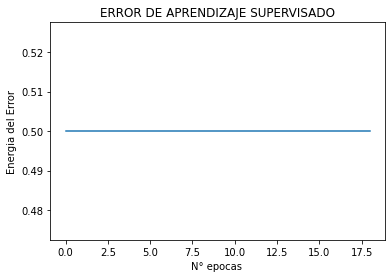

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


In [29]:
costos=lossf.copy()
epoca=np.arange(0,epocas,2)
print(epoca.size,len(lossf))
plt.plot(epoca,lossf)
plt.title("ERROR DE APRENDIZAJE SUPERVISADO")
plt.xlabel("N° epocas ")
plt.ylabel("Energia del Error")
plt.show()
print(lossf)

# New Section